### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
from matplotlib.markers import MarkerStyle
set_matplotlib_formats('png', 'pdf')

/var/folders/vq/knfnd3fs6x19mn5xcw685flr0000gq/T/ipykernel_28789/958596905.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# One-dimensional bifurcations

## Question 1
For each of the 1D vector fields A – G:

A) $\frac{dx}{dt} = r - x^2$

B) $\frac{dx}{dt} = rx - x^2$ 

C) $\frac{dx}{dt} = rx - 4x^3$ 

D) $\frac{dx}{dt} = rx + 4x^3$ 

E) $\frac{dx}{dt} = rx - sinh(x)$  

F) $\frac{dx}{dt} = x + \frac{rx}{1 + x^2}$  

1.1 Sketch the vector field for the three cases r < 0, r = 0, r > 0 (labelled by their value of r), mark the fixed point(s) and their stability, and indicate the direction of flow of the vector field on the diagram.

1.2 Sketch a few typical trajectories for the three cases, r < 0, r = 0, r > 0.

1.3 Draw the bifurcation diagram and label the branches as stable or unstable (use a solid line for stable branches and a dashed line for unstable branches).

1.4 Identify the type of bifurcation in the bifurcation diagram.


### A) $\frac{dx}{dt} = r - x^2$

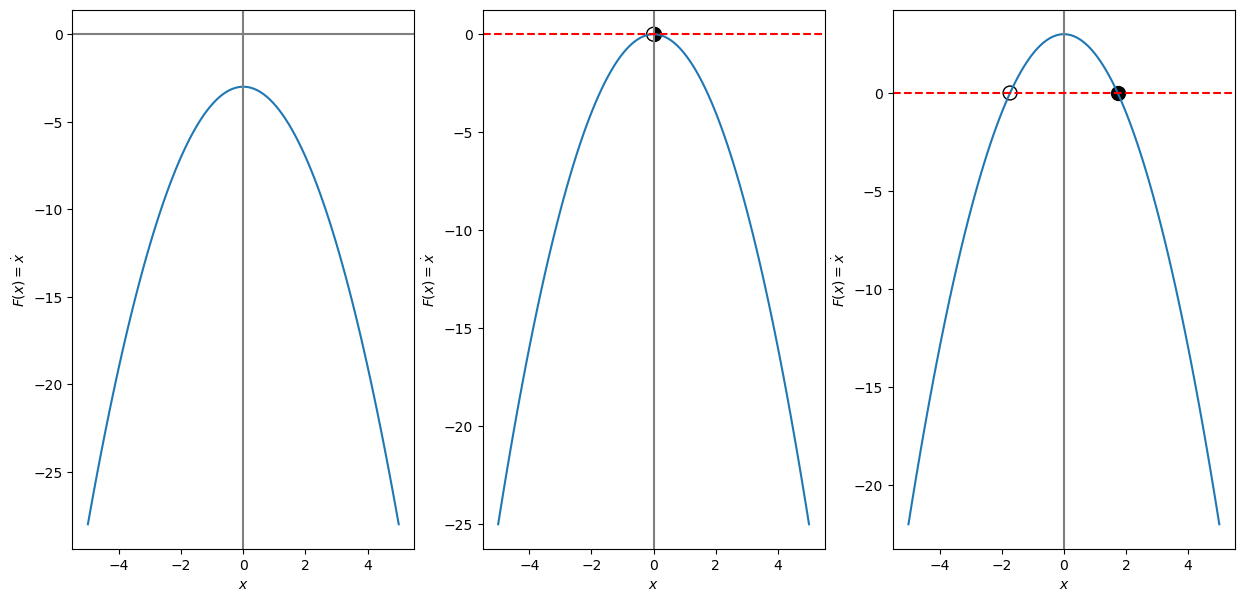

In [2]:
# define F(x)
def F(x, r, t = 0):
# t plays no role as the system is autonomous but is needed for odeint 
    return r-x**2

# show F(x)
x = np.linspace(-5,5,100)
y_1 = F(x, r=-3)
y_2 = F(x, r=0)
y_3 = F(x, r=3)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
ax1.plot(x,y_1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$F(x)=\dot{x}$')
ax1.axvline(color='tab:gray')
ax1.axhline(color='tab:gray')

ax2.plot(x,y_2)
ax2.scatter(x=0,y=0, marker='o', s = 100, color = 'black', facecolors='none')
ax2.scatter(x=0,y=0, marker= MarkerStyle('o', fillstyle = 'right'), s = 100,color='black')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$F(x)=\dot{x}$')
ax2.axvline(color='tab:gray')
ax2.axhline(y = 0, color = 'red', ls = '--')

ax3.plot(x,y_3)
ax3.axvline(color='tab:gray')
ax3.axhline(y = 0, color = 'red', ls = '--')
ax3.scatter(x=-np.sqrt(3),y=0, marker='o', s = 100, color = 'black', facecolors='none')
ax3.scatter(x=np.sqrt(3),y=0, marker='o', s = 100, color = 'black')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$F(x)=\dot{x}$')
plt.show()

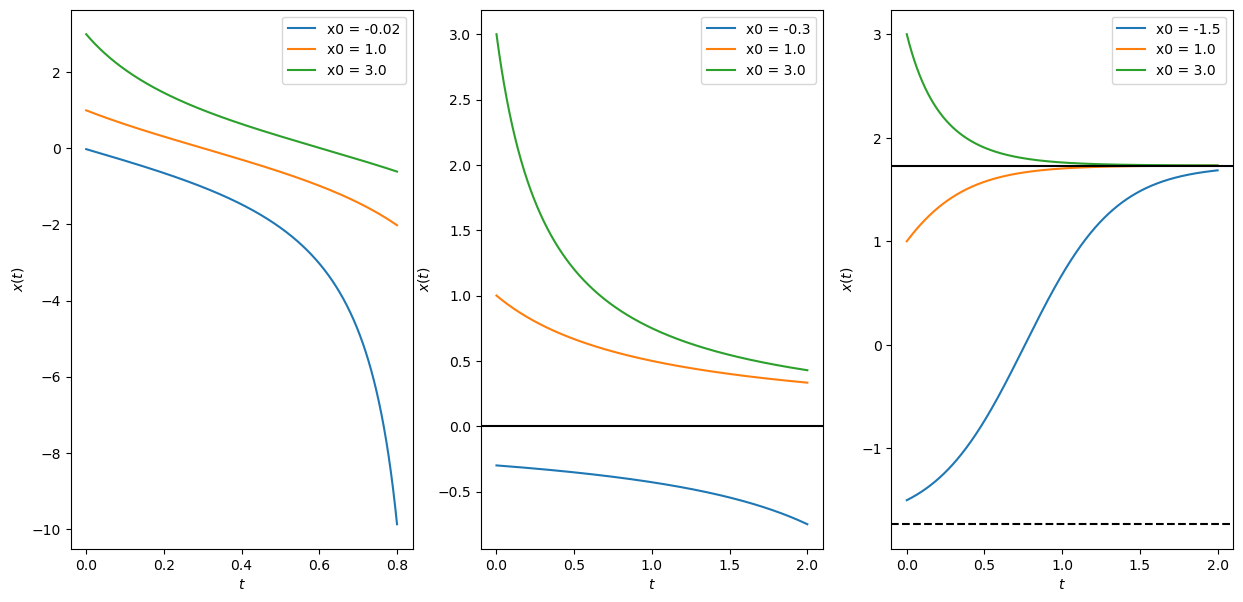

In [3]:
# simulate F(x) in time

def F(x, t = 0):
    return -3-x**2

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,0.8,1000)
l_x0 = [-0.02, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return -x**2

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [-0.3, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.axhline(y = 0., color = 'black', ls = '-')
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return 3-x**2

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [-1.5, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.axhline(y = np.sqrt(3), color = 'black', ls = '-')
ax3.axhline(y = -np.sqrt(3), color = 'black', ls = '--')
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

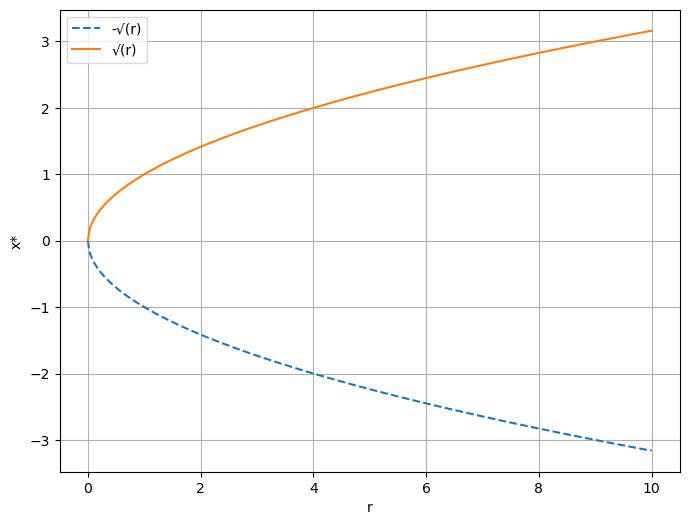

In [49]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0, 10, 400)

y1 = -np.sqrt(r)
y2 = np.sqrt(r)

plt.figure(figsize=(8, 6))

plt.plot(r, y1, label='-√(r)', linestyle='--')  # Normal linestyle
plt.plot(r, y2, label='√(r)', linestyle='-')  # Dashed linestyle

plt.xlabel('r')
plt.ylabel('x*')

plt.legend()

plt.grid(True)

plt.show() ## it's a saddlenode bifurcation

### B) $\frac{dx}{dt} = rx - x^2$ 

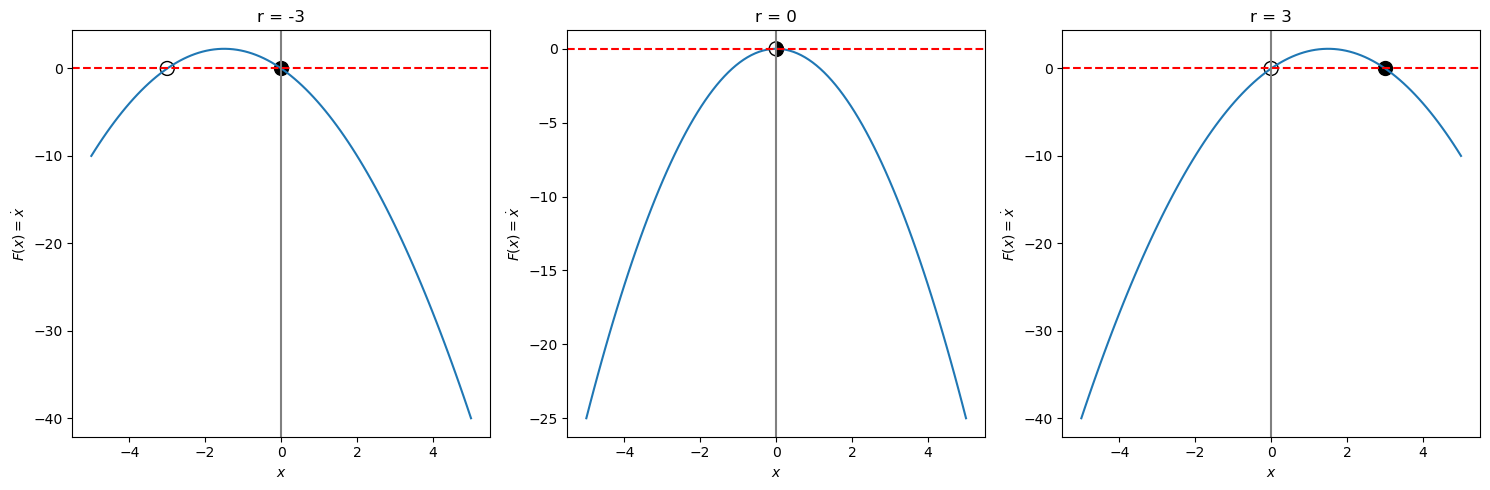

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

def F(x, r, t = 0):
    return r * x - x**2

x = np.linspace(-5, 5, 100)

# Case 1: r < 0
r = -3
y = F(x, r)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.scatter(x=0, y=0, marker='o', s = 100, color='black')
plt.scatter(x=r, y=0, marker='o', s = 100, color='black', facecolors='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='gray')
plt.xlabel('$x$')
plt.ylabel('$F(x)=\dot{x}$')
plt.title('r = -3')

# Case 2: r = 0
r = 0
y = F(x, r)
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.scatter(x=0,y=0, marker='o', s = 100, color = 'black', facecolors='none')
plt.scatter(x=0,y=0, marker= MarkerStyle('o', fillstyle = 'right'), s = 100,color='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='gray')
plt.xlabel('$x$')
plt.ylabel('$F(x)=\dot{x}$')
plt.title('r = 0')

# Case 3: r > 0
r = 3
y = F(x, r)
plt.subplot(1, 3, 3)
plt.plot(x, y)
plt.scatter(x=0, y=0, marker='o', s = 100, color='black', facecolors='none')
plt.scatter(x=r, y=0, marker='o', s = 100, color='black') 
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='gray')
plt.xlabel('$x$')
plt.ylabel('$F(x)=\dot{x}$')
plt.title('r = 3')

plt.tight_layout()
plt.show()


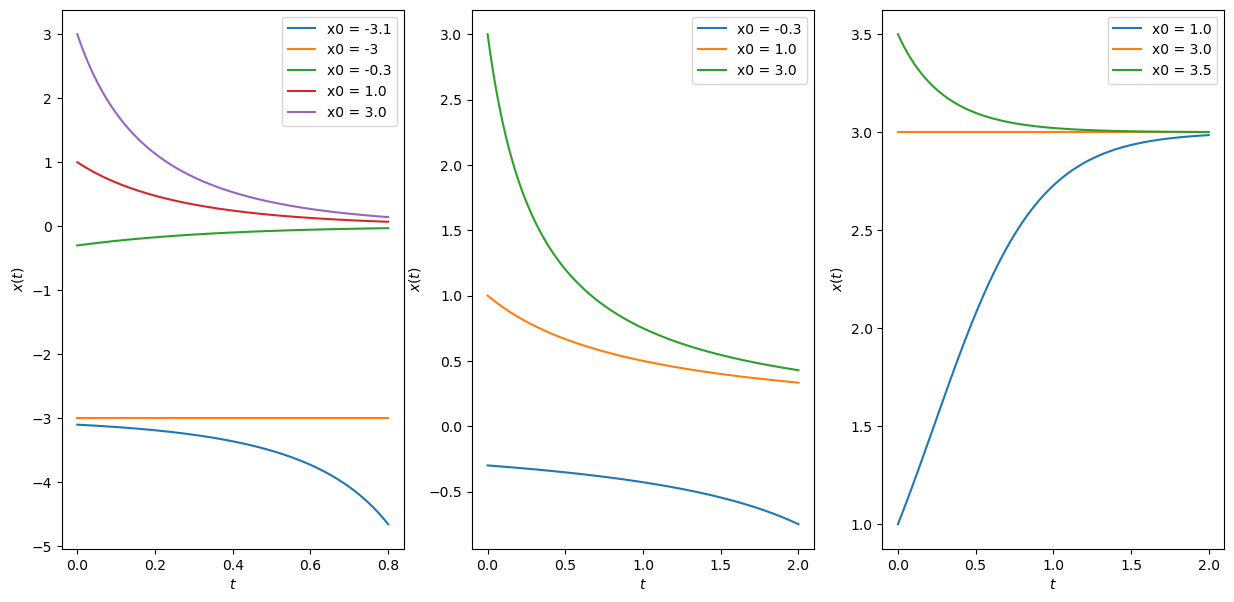

In [16]:
# simulate F(x) in time

def F(x, t = 0):
    return -3 * x - x**2

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,0.8,1000)
l_x0 = [-3.1, -3, -0.3, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return - x**2

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [-0.3, 1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return 3 * x - x**2

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [1., 3., 3.5]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

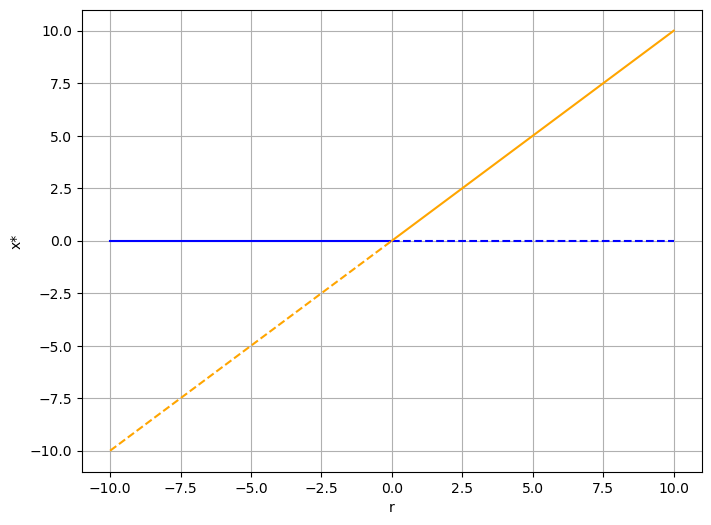

In [50]:
import matplotlib.pyplot as plt
import numpy as np

r_negative = np.linspace(-10, 0, 200, endpoint=False)
r_positive = np.linspace(0, 10, 200)

x_star_zero_neg = np.zeros_like(r_negative)
x_star_zero_pos = np.zeros_like(r_positive)

x_star_r_neg = r_negative
x_star_r_pos = r_positive

plt.figure(figsize=(8, 6))
plt.plot(r_negative, x_star_zero_neg, linestyle='-', color='blue')  # Normal line for r < 0
plt.plot(r_positive, x_star_zero_pos, linestyle='--', color='blue')  # Dashed line for r > 0
plt.plot(r_negative, x_star_r_neg, linestyle='--', color='orange')  # Dashed line for r < 0
plt.plot(r_positive, x_star_r_pos, linestyle='-', color='orange')  # Normal line for r > 0

plt.xlabel('r')
plt.ylabel('x*')

plt.grid(True)

plt.show() ## it's a transcritical bifurcation

### C) $\frac{dx}{dt} = rx - 4x^3$ 

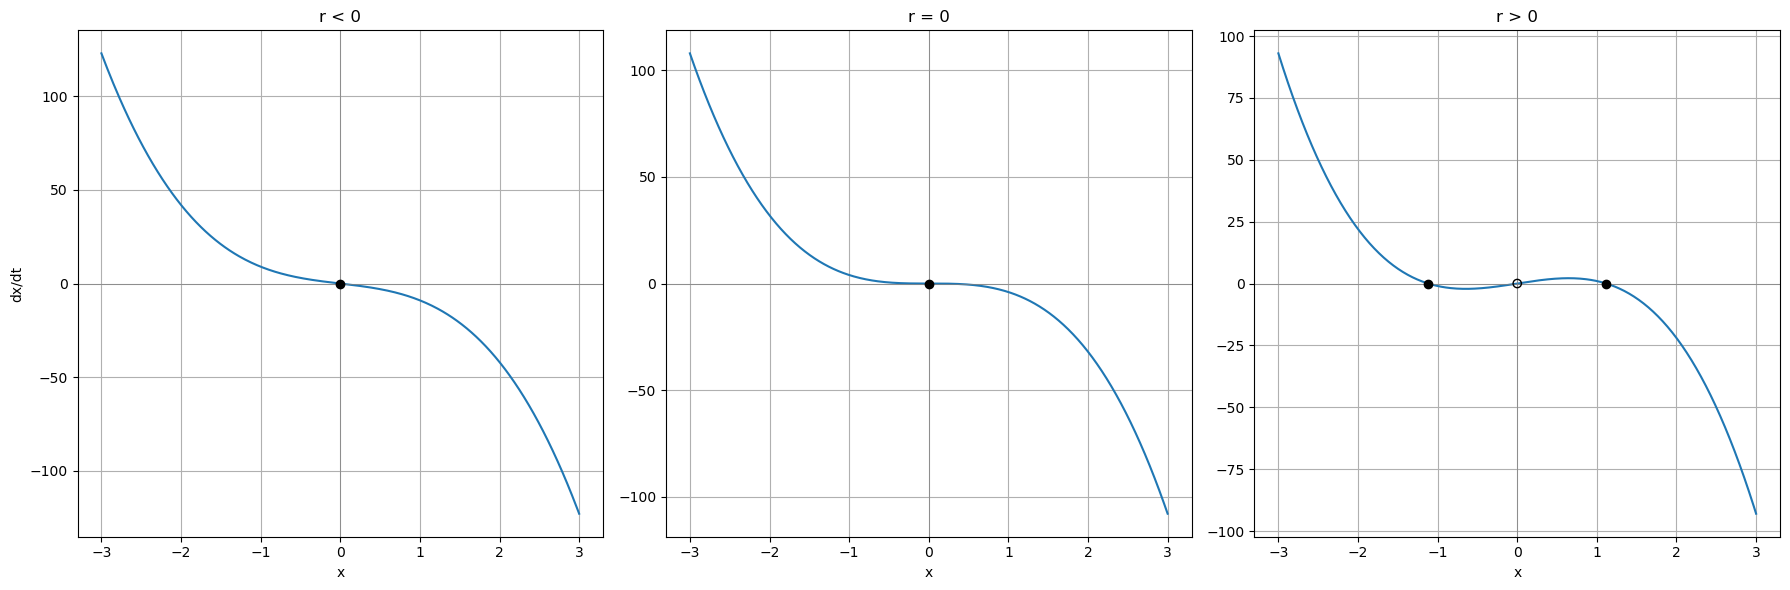

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

def F(x, r):
    return r * x - 4 * x**3

x = np.linspace(-3, 3, 400)

y_neg = F(x, r=-5)  # r < 0
y_zero = F(x, r=0)  # r = 0
y_pos = F(x, r=5)   # r > 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# r < 0
ax1.plot(x, y_neg, label='r=-5')
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.scatter(0, 0, color='black', zorder=5)
ax1.set_title("r < 0")
ax1.set_xlabel('x')
ax1.set_ylabel('dx/dt')
ax1.grid(True)

# r = 0
ax2.plot(x, y_zero, label='r=0')
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.scatter(0, 0, color='black', zorder=5)
ax2.set_title("r = 0")
ax2.set_xlabel('x')
ax2.grid(True)

# r > 0
ax3.plot(x, y_pos, label='r=5')
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
sqrt_r_4 = np.sqrt(5 / 4)
ax3.scatter([sqrt_r_4, -sqrt_r_4], [0, 0], color='black', zorder=5)
ax3.scatter(0, 0, color='black', facecolors='none', zorder=5)
ax3.set_title("r > 0")
ax3.set_xlabel('x')
ax3.grid(True)

plt.tight_layout()
plt.show()

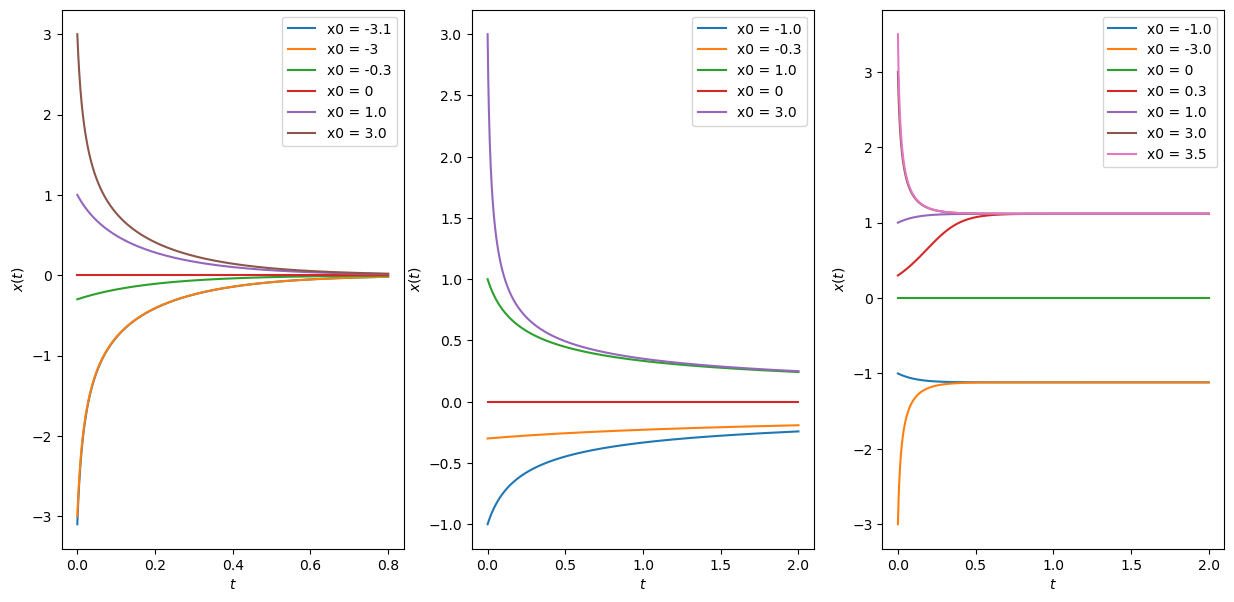

In [21]:
# simulate F(x) in time

def F(x, t = 0):
    return -5 * x - 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,0.8,1000)
l_x0 = [-3.1, -3, -0.3, 0,  1., 3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return - 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [-1., -0.3, 1., 0,  3.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return 5 * x - 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [-1., -3., 0, 0.3, 1., 3., 3.5]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

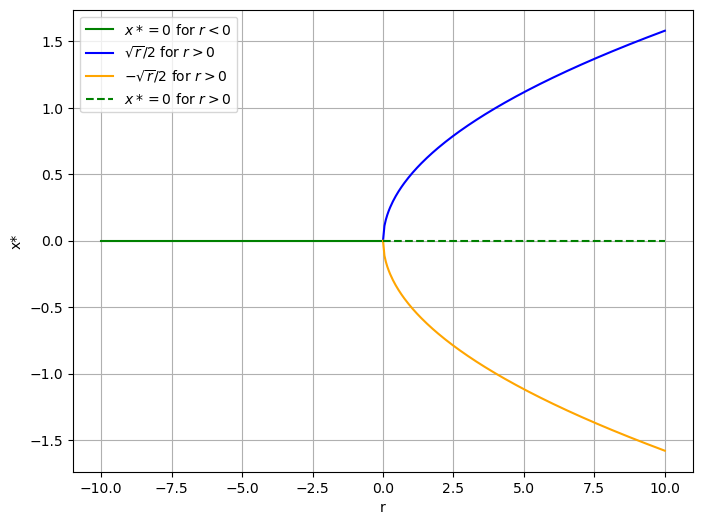

In [52]:
import matplotlib.pyplot as plt
import numpy as np

r_negative = np.linspace(-10, 0, 200, endpoint=False)
r_positive = np.linspace(0, 10, 200)

sqrt_r_over_2_pos = np.sqrt(r_positive) / 2
minus_sqrt_r_over_2_pos = -sqrt_r_over_2_pos

zero_neg = np.zeros_like(r_negative)

zero_pos = np.zeros_like(r_positive)

plt.figure(figsize=(8, 6))

plt.plot(r_negative, zero_neg, linestyle='-', color='green', label='$x* = 0$ for $r < 0$')  # Normal line

plt.plot(r_positive, sqrt_r_over_2_pos, linestyle='-', color='blue', label='$\sqrt{r}/2$ for $r > 0$')  # Normal line
plt.plot(r_positive, minus_sqrt_r_over_2_pos, linestyle='-', color='orange', label='$-\sqrt{r}/2$ for $r > 0$')  # Normal line
plt.plot(r_positive, zero_pos, linestyle='--', color='green', label='$x* = 0$ for $r > 0$')  # Dashed line

plt.xlabel('r')
plt.ylabel('x*')

plt.legend()

plt.grid(True)

plt.show() ## it's a supercritical pitchfork bifurcation

### D) $\frac{dx}{dt} = rx + 4x^3$ 

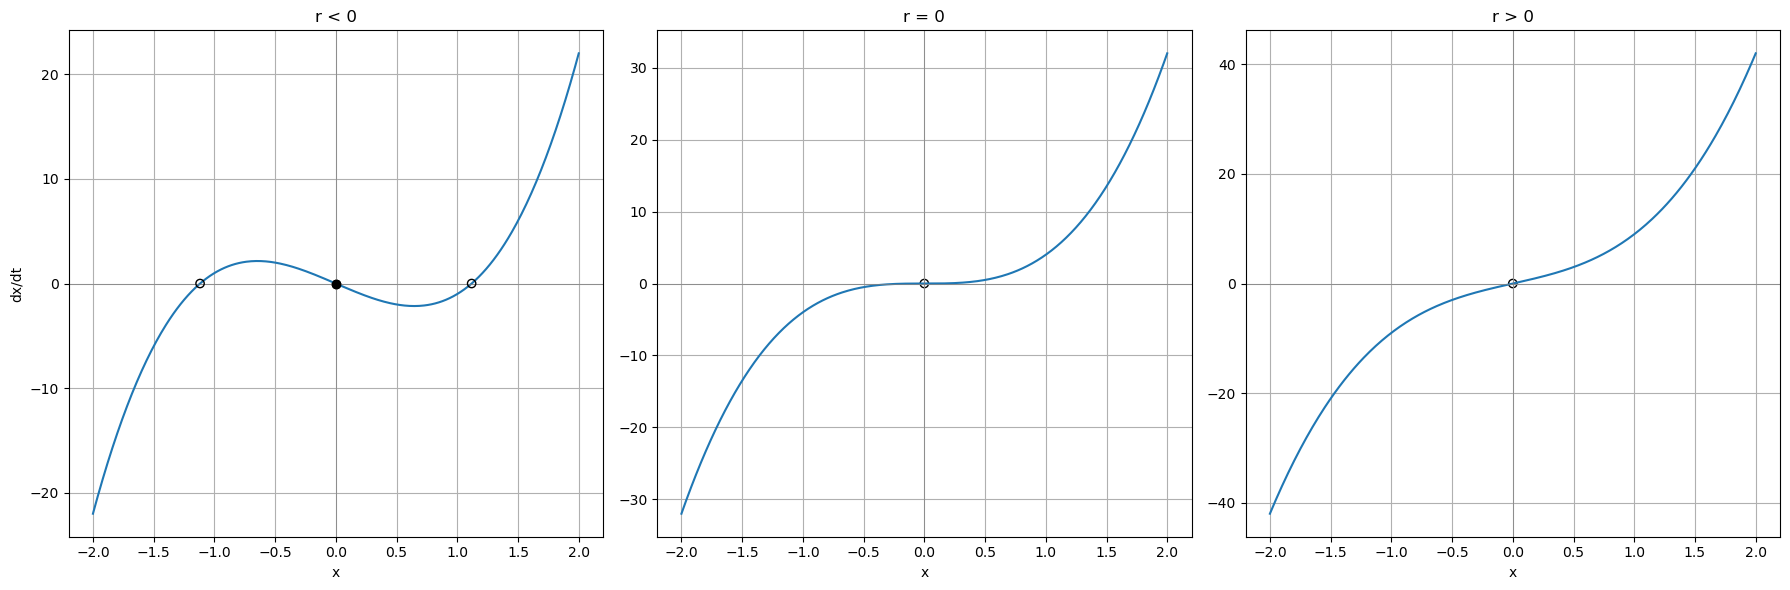

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def F(x, r):
    return r * x + 4 * x**3

x = np.linspace(-2, 2, 400)

y_neg = F(x, r=-5)   # r < 0
y_zero = F(x, r=0)   # r = 0
y_pos = F(x, r=5)    # r > 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# r < 0
ax1.plot(x, y_neg)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.scatter(0, 0, color='black')
ax1.scatter([sqrt_r_4, -sqrt_r_4], [0, 0], color='black', zorder=5, facecolors='none') 
ax1.scatter(0, 0, color='black', zorder=5)
ax1.set_title("r < 0")
ax1.set_xlabel('x')
ax1.set_ylabel('dx/dt')
ax1.grid(True)

# r = 0
ax2.plot(x, y_zero)
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.scatter(0, 0, color='black', facecolors='none')
ax2.set_title("r = 0")
ax2.set_xlabel('x')
ax2.grid(True)

# r > 0
ax3.plot(x, y_pos)
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.scatter(0, 0, color='black', facecolors='none')
ax3.set_title("r > 0")
ax3.set_xlabel('x')
ax3.grid(True)

plt.tight_layout()
plt.show()


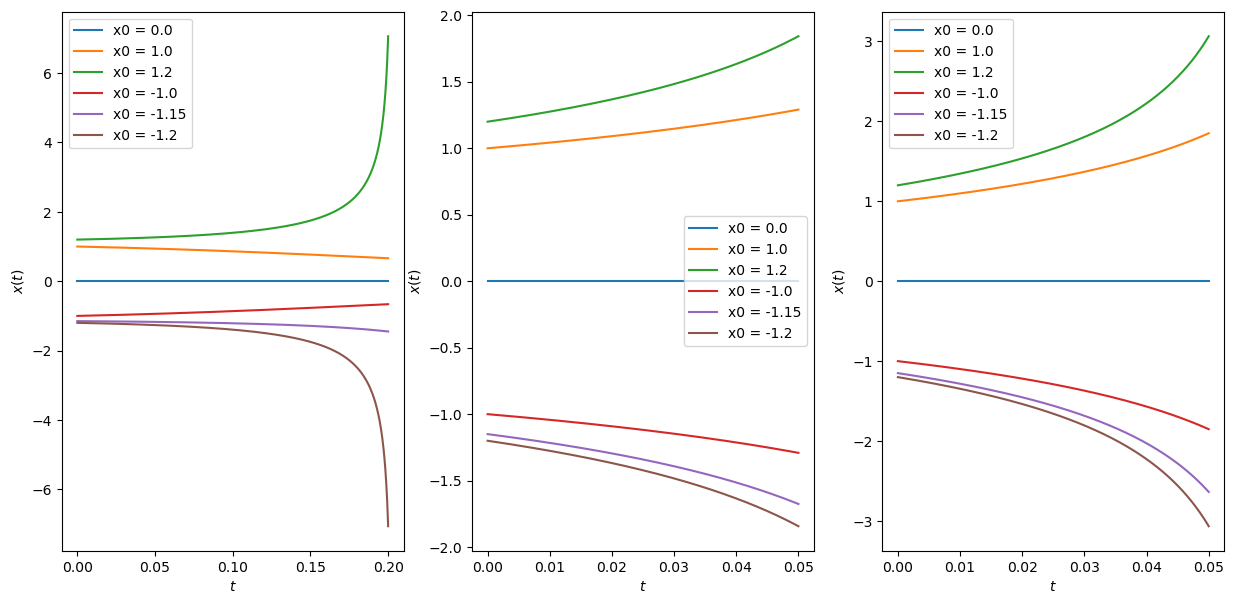

In [37]:
# simulate F(x) in time

def F(x, t = 0):
    return -5 * x + 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,0.2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,0.05,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return 5 * x + 4 * x**3

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,0.05,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

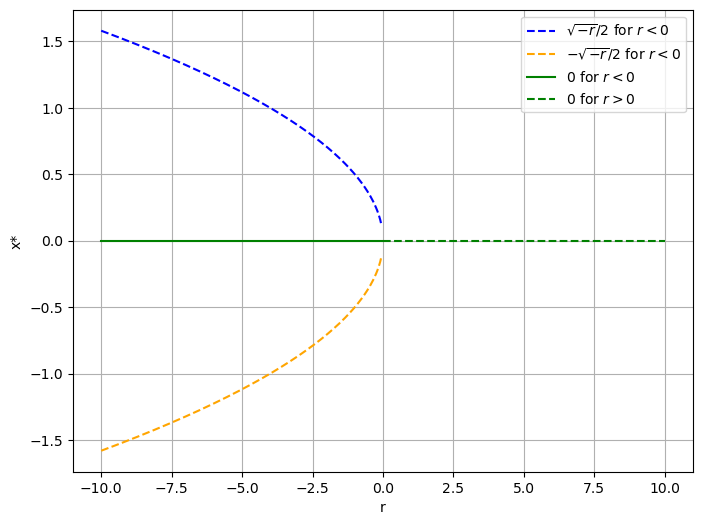

In [54]:
import matplotlib.pyplot as plt
import numpy as np

r_negative = np.linspace(-10, 0, 200, endpoint=False)  # Avoid including zero
r_positive = np.linspace(0, 10, 200)
sqrt_r_over_2_neg = np.sqrt(-r_negative) / 2
minus_sqrt_r_over_2_neg = -sqrt_r_over_2_neg
zero_neg = np.zeros_like(r_negative)

zero_pos = np.zeros_like(r_positive)

plt.figure(figsize=(8, 6))

plt.plot(r_negative, sqrt_r_over_2_neg, linestyle='--', color='blue', label='$\sqrt{-r}/2$ for $r<0$')  # Normal line
plt.plot(r_negative, minus_sqrt_r_over_2_neg, linestyle='--', color='orange', label='$-\sqrt{-r}/2$ for $r<0$')  # Normal line
plt.plot(r_negative, zero_neg, linestyle='-', color='green', label='$0$ for $r<0$')  # Normal line

plt.plot(r_positive, zero_pos, linestyle='--', color='green', label='$0$ for $r>0$')  # Dashed line

plt.xlabel('r')
plt.ylabel('x*')

plt.legend()

plt.grid(True)

plt.show() ## this is a subcritical pitchfork bifurcation

### E) $\frac{dx}{dt} = rx - sinh(x)$  

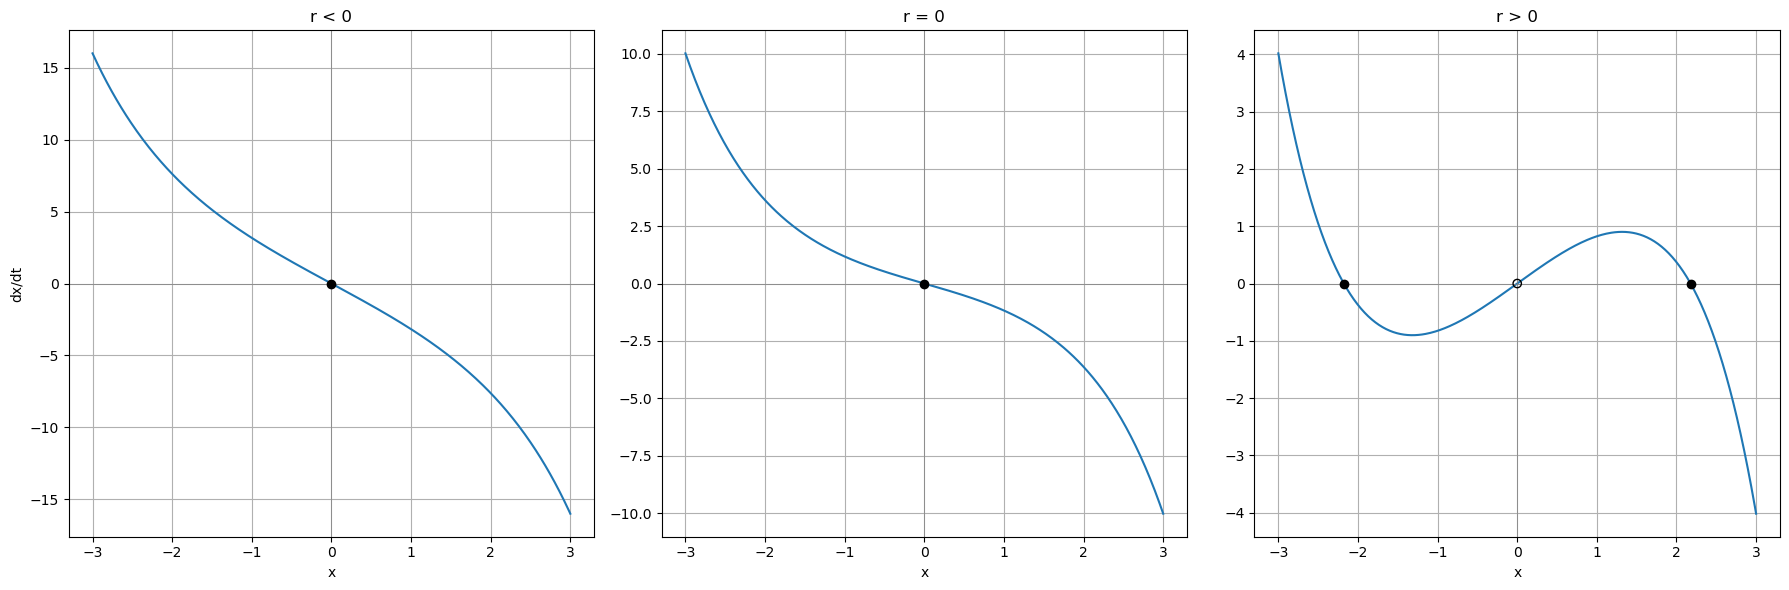

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def F(x, r):
    return r * x - np.sinh(x)

x = np.linspace(-3, 3, 400)

y_neg = F(x, r=-2)   # r < 0
y_zero = F(x, r=0)   # r = 0
y_pos = F(x, r=2)    # r > 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# r < 0
ax1.plot(x, y_neg)
ax1.scatter(0, 0, color='black', zorder=5)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_title("r < 0")
ax1.set_xlabel('x')
ax1.set_ylabel('dx/dt')
ax1.grid(True)

# r = 0
ax2.plot(x, y_zero)
ax2.scatter(0, 0, color='black', zorder=5)
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.set_title("r = 0")
ax2.set_xlabel('x')
ax2.grid(True)

# r > 0
ax3.plot(x, y_pos)
ax3.scatter(0, 0, color='black', zorder=5, facecolors='none')
ax3.scatter(-2.177, 0, color='black', zorder=5)
ax3.scatter(2.177, 0, color='black', zorder=5)
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.set_title("r > 0")
ax3.set_xlabel('x')
ax3.grid(True)

plt.tight_layout()
plt.show()


# Note, there is no analytical solution for this exercise. You should use the trick to cross the two curves to find the fixed points (qualitatively, i.e., how many there are depending on r)

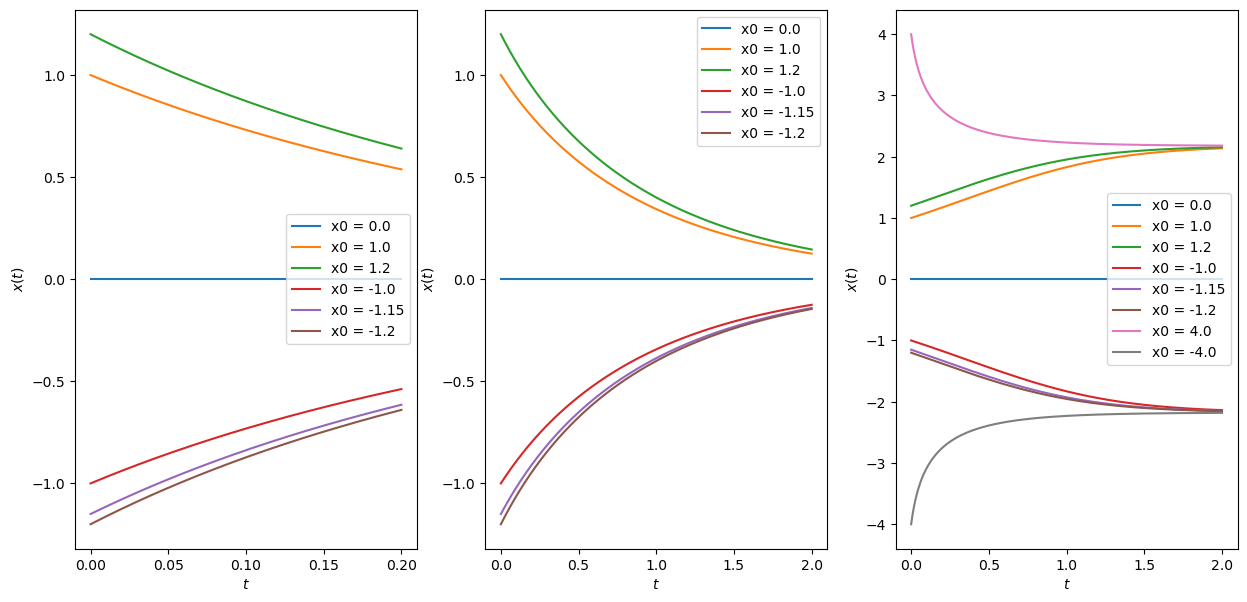

In [41]:
# simulate F(x) in time

def F(x, t = 0):
    return -2 * x - np.sinh(x)

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,0.2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return - np.sinh(x)

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return 2 * x - np.sinh(x)

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2, 4., -4.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

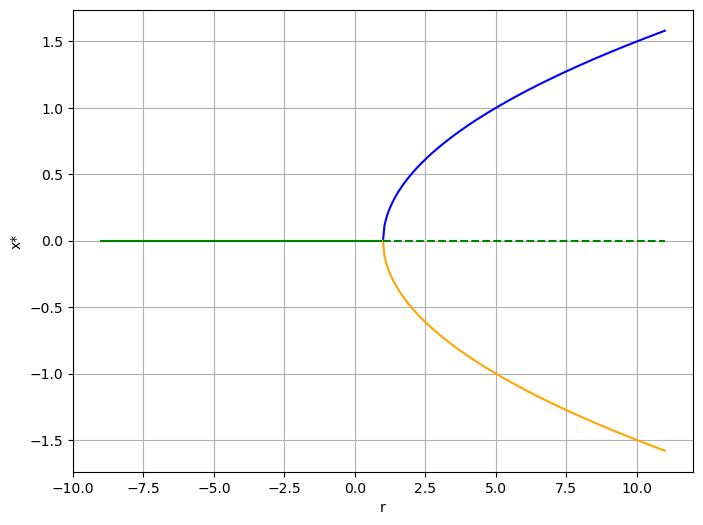

In [67]:
#### note here the shape i'm drawing is not correct, just to show you the trend

import matplotlib.pyplot as plt
import numpy as np

r_negative = np.linspace(-10, 0, 200, endpoint=False)
r_positive = np.linspace(0, 10, 200)

sqrt_r_over_2_pos = np.sqrt(r_positive) / 2
minus_sqrt_r_over_2_pos = -sqrt_r_over_2_pos

zero_neg = np.zeros_like(r_negative)

zero_pos = np.zeros_like(r_positive)

plt.figure(figsize=(8, 6))

plt.plot(r_negative+ 1, zero_neg, linestyle='-', color='green', label='$x* = 0$ for $r < 0$')  # Normal line

plt.plot(r_positive + 1, sqrt_r_over_2_pos, linestyle='-', color='blue', label='$\sqrt{r}/2$ for $r > 0$')  # Normal line
plt.plot(r_positive + 1, minus_sqrt_r_over_2_pos, linestyle='-', color='orange', label='$-\sqrt{r}/2$ for $r > 0$')  # Normal line
plt.plot(r_positive + 1, zero_pos, linestyle='--', color='green', label='$x* = 0$ for $r > 0$')  # Dashed line

plt.xlabel('r')
plt.ylabel('x*')

plt.grid(True)

plt.show() ## it's a supercritical pitchfork bifurcation

### F) $\frac{dx}{dt} = x + \frac{rx}{1 + x^2}$ 

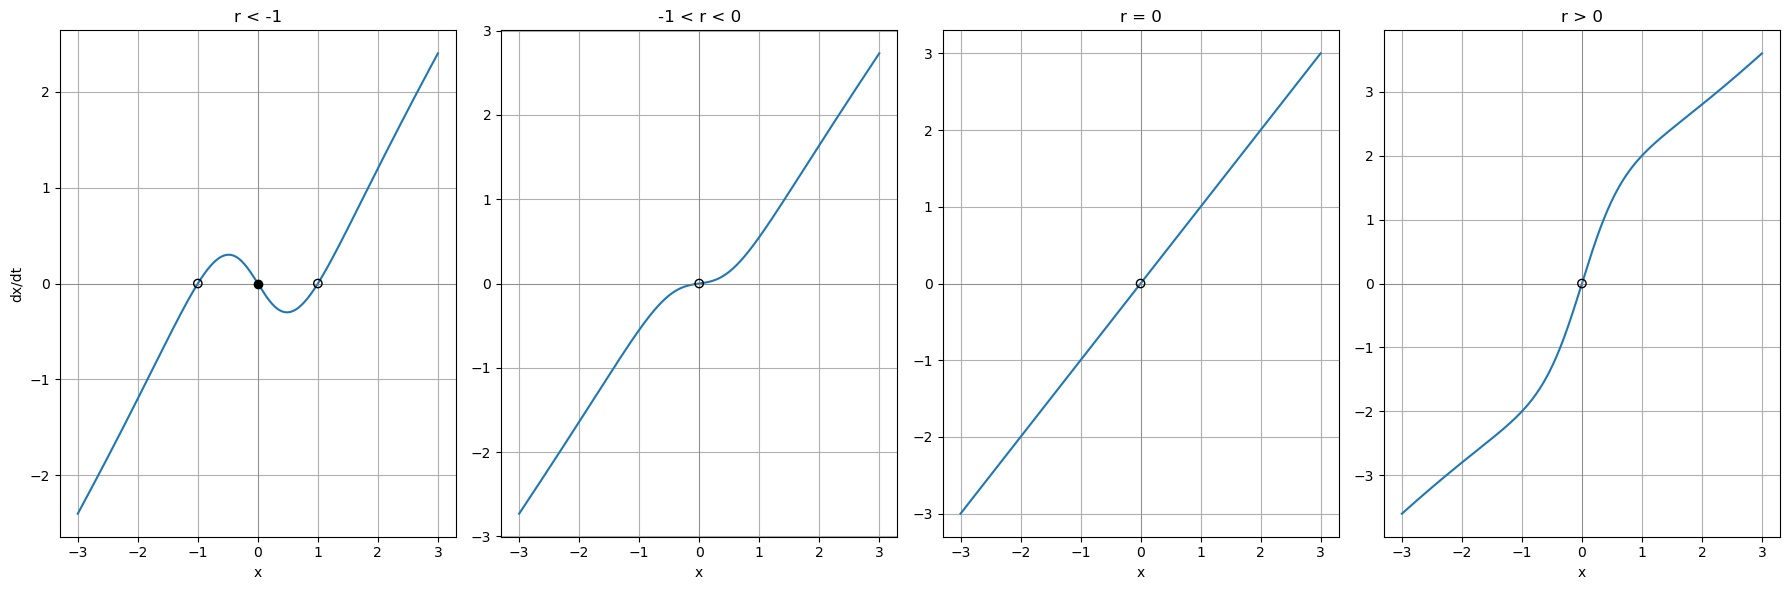

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def F(x, r):
    return x + r * x / (1 + x**2)

x = np.linspace(-3, 3, 400)

y_neg = F(x, r=-2)   # r < -1
y_neg2 = F(x, r=-0.9)   # -1 < r < 0
y_zero = F(x, r=0)   # r = 0
y_pos = F(x, r=2)    # r > 0

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6))

# r < -1
ax1.plot(x, y_neg)
ax1.scatter(0, 0, color='black', zorder=5)
ax1.scatter(np.sqrt(2-1), 0, color='black', zorder=5, facecolors='none')
ax1.scatter(-np.sqrt(2-1), 0, color='black', zorder=5, facecolors='none')
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_title("r < -1")
ax1.set_xlabel('x')
ax1.set_ylabel('dx/dt')
ax1.grid(True)

# -1 < r < 0
ax2.plot(x, y_neg2)
ax2.scatter(0, 0, color='black', zorder=5, facecolors='none')
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.set_title("-1 < r < 0")
ax2.set_xlabel('x')
ax2.grid(True)

# r = 0
ax3.plot(x, y_zero)
ax3.scatter(0, 0, color='black', zorder=5, facecolors='none')
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.set_title("r = 0")
ax3.set_xlabel('x')
ax3.grid(True)

# r > 0
ax4.plot(x, y_pos)
ax4.scatter(0, 0, color='black', zorder=5, facecolors='none')
ax4.axhline(0, color='gray', lw=0.5)
ax4.axvline(0, color='gray', lw=0.5)
ax4.set_title("r > 0")
ax4.set_xlabel('x')
ax4.grid(True)

plt.tight_layout()
plt.show()

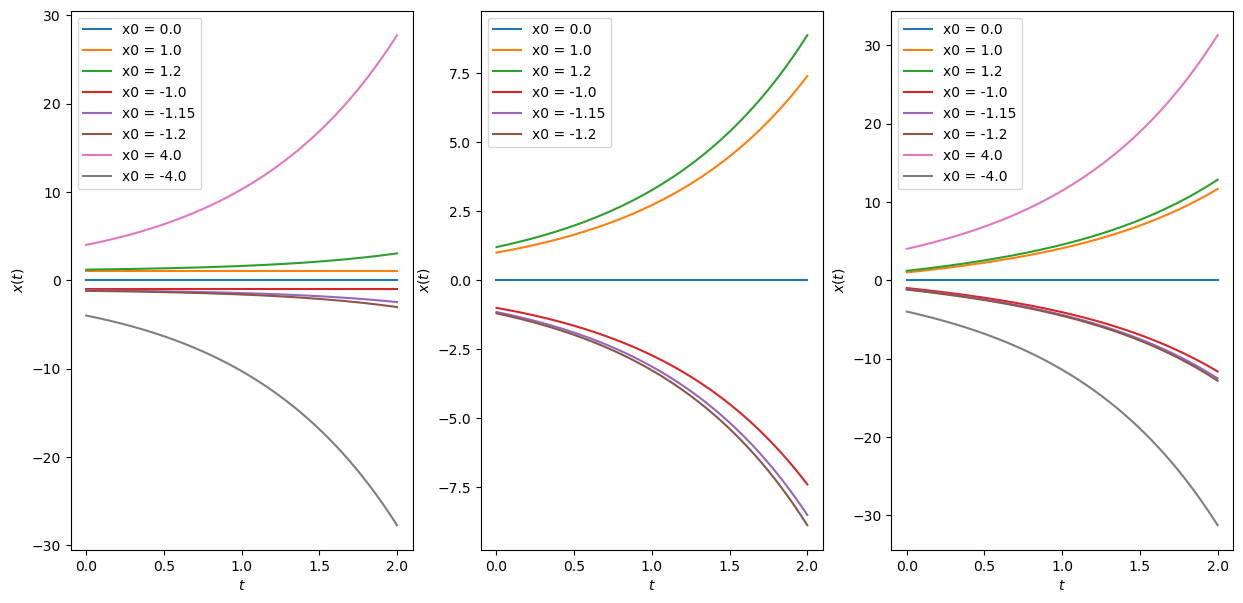

In [45]:
# simulate F(x) in time

def F(x, t = 0):
    return x -2 * x / (1 + x**2)

x = np.linspace(-5,5,100)
y = F(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,7))
tspan = np.linspace(0,2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2, 4., -4.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax1.plot(tspan,X, label = 'x0 = ' + str(x0))
ax1.set_ylabel(r'$x(t)$')
ax1.set_xlabel(r'$t$')
ax1.legend()


def F(x, t = 0):
    return x

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax2.plot(tspan,X, label = 'x0 = ' + str(x0))
ax2.set_ylabel(r'$x(t)$')
ax2.set_xlabel(r'$t$')
ax2.legend()


def F(x, t = 0):
    return x +2 * x / (1 + x**2)

x = np.linspace(-5,5,100)
y = F(x)
tspan = np.linspace(0,2,1000)
l_x0 = [0., 1., 1.2, -1., -1.15, -1.2, 4., -4.]
for x0 in l_x0:
    X = odeint(F, x0 ,tspan)
    ax3.plot(tspan,X, label = 'x0 = ' + str(x0))
ax3.set_ylabel(r'$x(t)$')
ax3.set_xlabel(r'$t$')
ax3.legend()
plt.show()

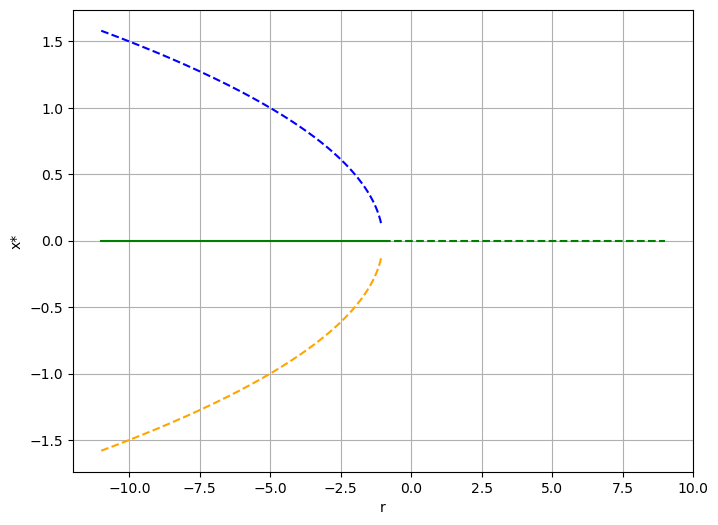

In [68]:
#### note here the shape i'm drawing is not correct, just to show you the trend

import matplotlib.pyplot as plt
import numpy as np

r_negative = np.linspace(-10, 0, 200, endpoint=False)  # Avoid including zero
r_positive = np.linspace(0, 10, 200)
sqrt_r_over_2_neg = np.sqrt(-r_negative) / 2
minus_sqrt_r_over_2_neg = -sqrt_r_over_2_neg
zero_neg = np.zeros_like(r_negative)

zero_pos = np.zeros_like(r_positive)

plt.figure(figsize=(8, 6))

plt.plot(r_negative-1, sqrt_r_over_2_neg, linestyle='--', color='blue', label='$\sqrt{-r}/2$ for $r<0$')  # Normal line
plt.plot(r_negative-1, minus_sqrt_r_over_2_neg, linestyle='--', color='orange', label='$-\sqrt{-r}/2$ for $r<0$')  # Normal line
plt.plot(r_negative-1, zero_neg, linestyle='-', color='green', label='$0$ for $r<0$')  # Normal line

plt.plot(r_positive-1, zero_pos, linestyle='--', color='green', label='$0$ for $r>0$')  # Dashed line

plt.xlabel('r')
plt.ylabel('x*')

plt.grid(True)

plt.show() ## this is a subcritical pitchfork bifurcation

## Question 2
Construct a vector field that depends on a real parameter r, dx/dt = f(r, x), and that has no fixed points for r < 0, and four fixed points for r > 0. Sketch the vector field in the two cases, indicate the direction of flow, and label any fixed points with their stability.  




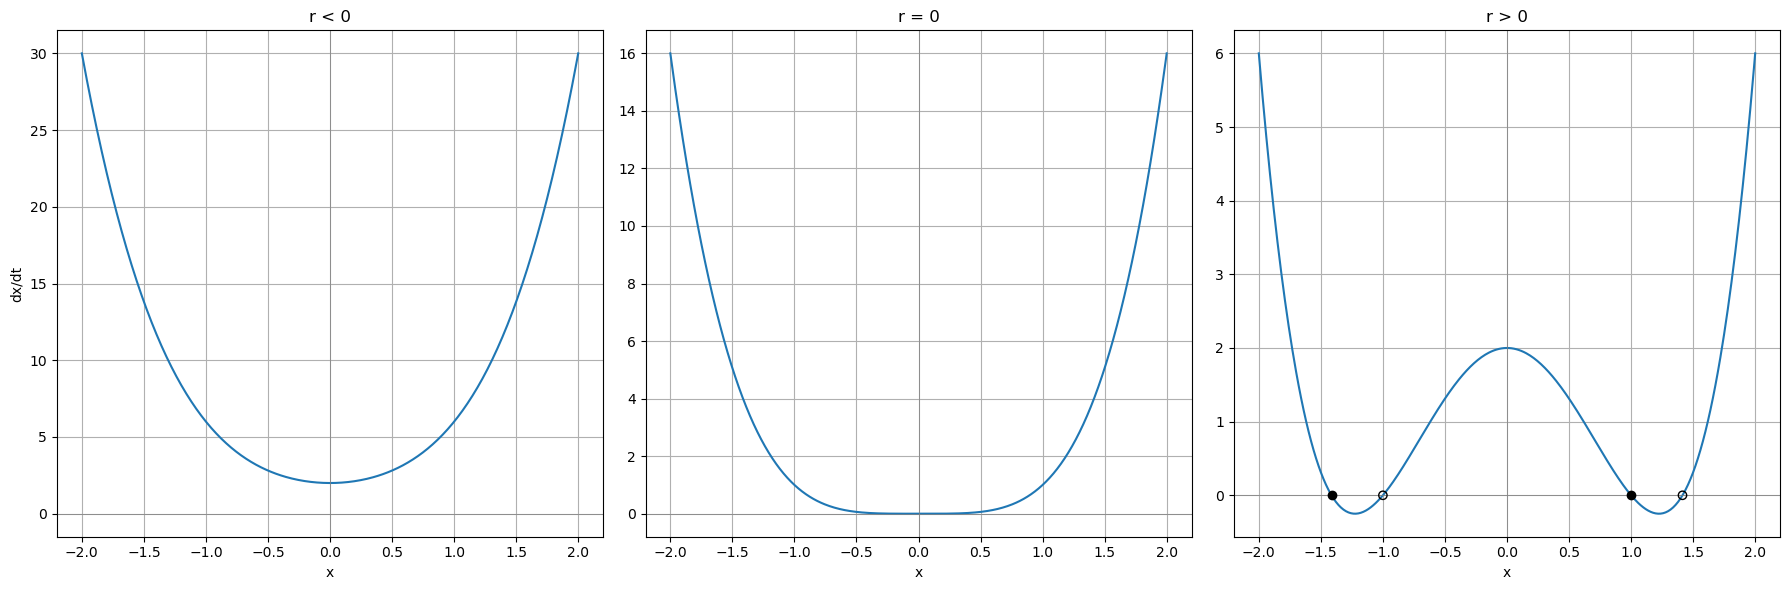

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def F(x, r):
    return (r - x**2) * (2*r - x**2)

x = np.linspace(-2, 2, 400)

y_neg = F(x, r=-1)   # r < 0
y_zero = F(x, r=0)   # r = 0
y_pos = F(x, r=1)    # r > 0

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# r < 0
ax1.plot(x, y_neg)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_title("r < 0")
ax1.set_xlabel('x')
ax1.set_ylabel('dx/dt')
ax1.grid(True)

# r = 0
ax2.plot(x, y_zero)
ax2.axhline(0, color='gray', lw=0.5)
ax2.axvline(0, color='gray', lw=0.5)
ax2.set_title("r = 0")
ax2.set_xlabel('x')
ax2.grid(True)

# r > 0
ax3.plot(x, y_pos)
ax3.axhline(0, color='gray', lw=0.5)
ax3.axvline(0, color='gray', lw=0.5)
ax3.scatter(-np.sqrt(2), 0, color='black', zorder=5)
ax3.scatter(-1, 0, color='black', zorder=5, facecolors='none')
ax3.scatter(1, 0, color='black', zorder=5)
ax3.scatter(np.sqrt(2), 0, color='black', zorder=5, facecolors='none')
ax3.set_title("r > 0")
ax3.set_xlabel('x')
ax3.grid(True)

plt.tight_layout()
plt.show()


## Question 3
Draw the bifurcation diagram for the system in Question 2.


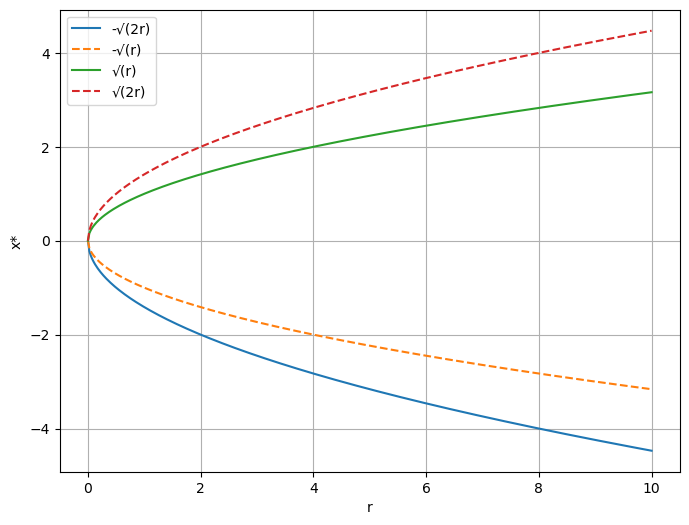

In [48]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0, 10, 400)

y1 = -np.sqrt(2 * r)
y2 = -np.sqrt(r)
y3 = np.sqrt(r)
y4 = np.sqrt(2 * r)

plt.figure(figsize=(8, 6))

plt.plot(r, y1, label='-√(2r)', linestyle='-')  # Normal linestyle
plt.plot(r, y2, label='-√(r)', linestyle='--')  # Dashed linestyle
plt.plot(r, y3, label='√(r)', linestyle='-')    # Normal linestyle
plt.plot(r, y4, label='√(2r)', linestyle='--')  # Dashed linestyle

plt.xlabel('r')
plt.ylabel('x*')

plt.legend()

plt.grid(True)

plt.show() ## i.e., fixed points only for r >=0, and it's a saddlenode bifurcation